# Movie Similarity Recommendation System
This is a simple movie recommendation system using item-item similarity

MovieLens dataset is used, which is one of the most common datasets used when implementing and testing recommender engines. It contains 100k movie ratings from 943 users and a selection of 1682 movies.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

## Let's read all the data, put it in dataframes and show the first five rows of each dataframe

In [43]:
column_names=['user_id', 'item_id', 'rating', 'timestamp']

In [44]:
df=pd.read_csv('u.data', sep='\t', names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [45]:
movie_titles=pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


## Since df and movie have a similar column "item_id" let's merge the two using this column

In [47]:
df=pd.merge(df, movie_titles, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Which movies have higest ratings? 

In [49]:
## This groupby method will provide highest rated movies regardless of how many people rated it.  
ratings=pd.DataFrame(df.groupby('title')['rating'].mean().sort_values(ascending=False))
ratings.head()

,rating
title,
Marlene Dietrich: Shadow and Light (1996),5.0
Prefontaine (1997),5.0
Santa with Muscles (1996),5.0
Star Kid (1997),5.0
Someone Else's America (1995),5.0


## What movies are most rated?

In [51]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [52]:
ratings['num_of_ratings']=pd.DataFrame(df.groupby('title')['rating'].count())

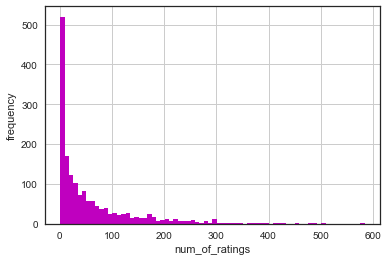

In [53]:
ratings.num_of_ratings.hist(bins=70, color='m')
plt.xlabel('num_of_ratings')
plt.ylabel('frequency')

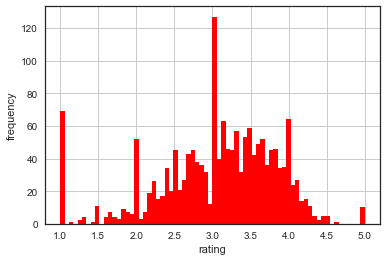

In [54]:
ratings.rating.hist(bins=70, color='r')
plt.xlabel('rating')
plt.ylabel('frequency')

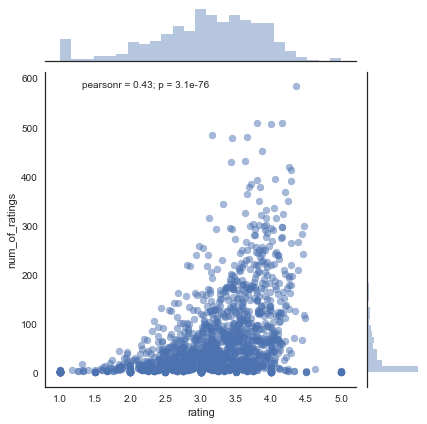

In [55]:
sns.jointplot(x='rating', y='num_of_ratings', data=ratings, alpha=0.5)

## The higher the number of ratings the higher the ratings looking at the graph above

## Now let's make the recommendation system

In [58]:
moviemat=df.pivot_table(index='user_id', columns='title', values='rating')

In [59]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Most rated movies

In [61]:
ratings.num_of_ratings.sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: num_of_ratings, dtype: int64

## Let's look at two movies "Star Wars 1977 and Liar Liar

In [63]:
star_wars_user_ratings=moviemat['Star Wars (1977)']
star_wars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [64]:
liar_liar_user_ratings=moviemat['Liar Liar (1997)']
liar_liar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

## Let's calculate the correlation of moviemat (all movie ratings) to star_wars_user ratings & liar_liar_user_ratings

In [65]:
similar_to_star_wars=moviemat.corrwith(star_wars_user_ratings)
similar_to_liar_liar=moviemat.corrwith(liar_liar_user_ratings)

C:\Users\pamel\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2487: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
C:\Users\pamel\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2496: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


## Calculates correlation coefficient of each movie to star wars 1977 movie

In [66]:
corr_star_wars=pd.DataFrame(similar_to_star_wars, columns=['Correlation'])
corr_star_wars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


## This are the movies that has high correlation with star wars 1977. Meaning people are also most likely to watch these movies if they watch star wars

In [67]:
corr_star_wars.sort_values('Correlation', ascending=False).head()

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


## Let's filter the movies with less than 100 revies

In [69]:
corr_star_wars=corr_star_wars.join(ratings['num_of_ratings'])

In [70]:
corr_star_wars[corr_star_wars.num_of_ratings>=100].sort_values('Correlation', ascending=False)

,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [71]:
corr_liar_liar=pd.DataFrame(similar_to_liar_liar, columns=['Correlation'])
corr_liar_liar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145


In [72]:
corr_liar_liar.sort_values('Correlation', ascending=False).head()

,Correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0


In [73]:
corr_liar_liar=corr_liar_liar.join(ratings['num_of_ratings'])

In [74]:
corr_liar_liar.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.118913,9
1-900 (1994),NaN,5
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41


## This are the movies that has high correlation with liar liar. Meaning people are also most likely to watch these movies if they liar liar

In [75]:
corr_liar_liar[corr_liar_liar.num_of_ratings>=100].sort_values('Correlation', ascending=False)

,Correlation,num_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
